# Average House Sale Prices forecast in Litchfield

This can be used as pipeline to forecast the median and average sale prices.
- Libraries used: pandas for dataframe
- Prophet from Facebook is used as a model to forecast the data.

In [24]:
#importing libraries

In [25]:
import pandas as pd
from prophet import Prophet

In [26]:
#ignoring the warnings occured during fitting the model

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Reading the data frame

In [29]:
data_frame=pd.read_csv('Litchfield.csv')

In [30]:
county_name=data_frame['County'].value_counts().index[0]

In [31]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price,County
0,2001-01-01,205326.17,287938.00,Litchfield
1,2001-02-01,193006.60,298960.24,Litchfield
2,2001-03-01,199242.44,294080.91,Litchfield
3,2001-04-01,212930.85,274440.40,Litchfield
4,2001-05-01,208368.04,294296.50,Litchfield


- Since the 'Date' feature is of object dtype. So, we need to convert that to date format
- Dropping the 'County' feature as it is no longer required

In [32]:
data_frame['Date']=pd.to_datetime(data_frame['Date'],format='%Y/%m/%d')
data_frame.drop(['County'],axis=1,inplace=True)

In [33]:
data_frame.head()

,Date,Median Sale Price,Average Sale Price
0,2001-01-01,205326.17,287938.00
1,2001-02-01,193006.60,298960.24
2,2001-03-01,199242.44,294080.91
3,2001-04-01,212930.85,274440.40
4,2001-05-01,208368.04,294296.50


Extracting only Median Sale Price as a dataframe by removing Median Sale Price feature

In [34]:
average_data=data_frame.drop(['Median Sale Price'],axis=1)

## Forecasting average_data

In [35]:
average_data.head()

,Date,Average Sale Price
0,2001-01-01,287938.00
1,2001-02-01,298960.24
2,2001-03-01,294080.91
3,2001-04-01,274440.40
4,2001-05-01,294296.50


### Changing the column names as 'ds' for 'Date' and 'y' for 'Median Sale Price'

In [36]:
average_data.columns=['ds','y']

In [37]:
average_data

,ds,y
0,2001-01-01,287938.00
1,2001-02-01,298960.24
2,2001-03-01,294080.91
3,2001-04-01,274440.40
4,2001-05-01,294296.50
...,...,...
245,2021-06-01,343079.16
246,2021-07-01,347221.93
247,2021-08-01,337142.80
248,2021-09-01,352563.24


In [38]:
#Initializing the Prophet model as m
m = Prophet()
#Fitting the model
m.fit(average_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
#creating the data frame with the next 24 months in 'ds'(Date)
future = m.make_future_dataframe(periods=24,freq='M')
future

,ds
0,2001-01-01
1,2001-02-01
2,2001-03-01
3,2001-04-01
4,2001-05-01
...,...
269,2023-05-31
270,2023-06-30
271,2023-07-31
272,2023-08-31


## Predicting the values for the new future dates.

In [40]:
forecast = m.predict(future)
#calling the dataframe with 'ds','yhat,'yhat_lower','yhat_upper' features
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
269,2023-05-31,360490.146075,315123.142795,403695.045251
270,2023-06-30,340200.451957,294519.431212,380297.705377
271,2023-07-31,339325.972051,290011.907105,384281.291316
272,2023-08-31,347307.727536,302585.535434,392201.374528
273,2023-09-30,322511.086765,277412.918805,368200.495950


Calling the forecast dataframe which contains the predicted values along with the actual values

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,288183.315697,242847.721872,331302.758557,288183.315697,288183.315697,-811.680446,-811.680446,-811.680446,-811.680446,-811.680446,-811.680446,0.0,0.0,0.0,287371.635251
1,2001-02-01,289714.437793,247932.186086,340194.025932,289714.437793,289714.437793,6008.924406,6008.924406,6008.924406,6008.924406,6008.924406,6008.924406,0.0,0.0,0.0,295723.362199
2,2001-03-01,291097.386783,231148.344267,322459.032496,291097.386783,291097.386783,-13417.521198,-13417.521198,-13417.521198,-13417.521198,-13417.521198,-13417.521198,0.0,0.0,0.0,277679.865585
3,2001-04-01,292628.508878,233663.270207,328518.131770,292628.508878,292628.508878,-10775.570137,-10775.570137,-10775.570137,-10775.570137,-10775.570137,-10775.570137,0.0,0.0,0.0,281852.938741
4,2001-05-01,294110.239939,257735.946271,349905.067416,294110.239939,294110.239939,9620.268041,9620.268041,9620.268041,9620.268041,9620.268041,9620.268041,0.0,0.0,0.0,303730.507979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2023-05-31,338155.335366,315123.142795,403695.045251,334026.397146,342139.559566,22334.810709,22334.810709,22334.810709,22334.810709,22334.810709,22334.810709,0.0,0.0,0.0,360490.146075
270,2023-06-30,339065.547816,294519.431212,380297.705377,334660.032215,343388.965504,1134.904141,1134.904141,1134.904141,1134.904141,1134.904141,1134.904141,0.0,0.0,0.0,340200.451957
271,2023-07-31,340006.100681,290011.907105,384281.291316,335239.583565,344778.710159,-680.128630,-680.128630,-680.128630,-680.128630,-680.128630,-680.128630,0.0,0.0,0.0,339325.972051
272,2023-08-31,340946.653545,302585.535434,392201.374528,335668.419280,346092.959803,6361.073991,6361.073991,6361.073991,6361.073991,6361.073991,6361.073991,0.0,0.0,0.0,347307.727536


## Plotting the forecast data

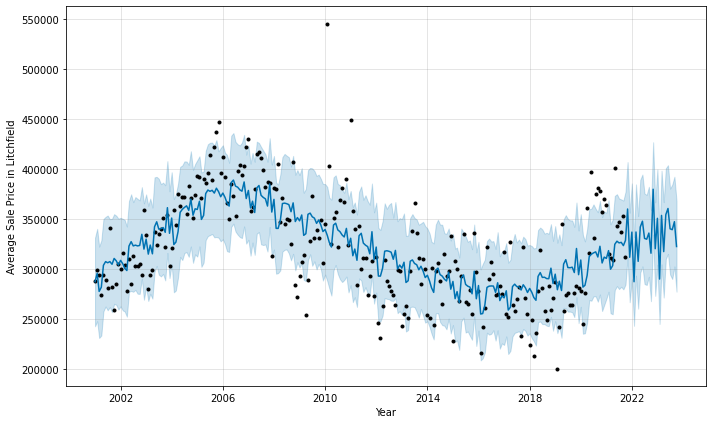

In [42]:
fig1 = m.plot(forecast,xlabel='Year',ylabel='Average Sale Price in '+county_name)

## Plotting components of forecast data

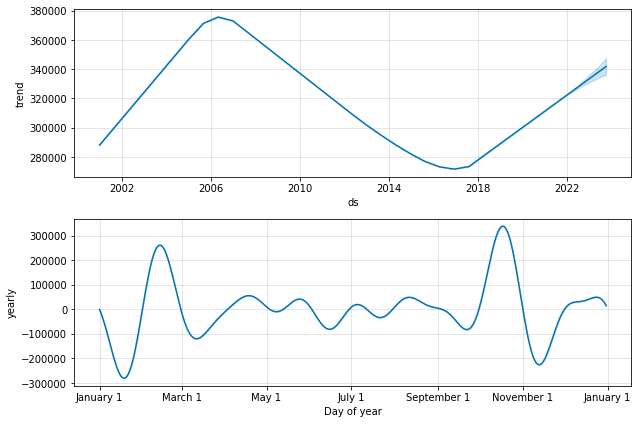

In [43]:
fig2 = m.plot_components(forecast)

## Plotting the final figure using prophet model and forecast data

In [44]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast,xlabel='Year',ylabel='Average Sale Price in '+county_name)

The black dots represents the actual values and the blue line which has a point straight to the black dot is the predicted value.

## Plotting the trend and yearly data

In [45]:
plot_components_plotly(m, forecast)

## Performing cross_validation to check the accuracy

In [46]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 37 forecasts with cutoffs between 2003-01-04 00:00:00 and 2020-10-01 00:00:00


  0%|          | 0/37 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 23.


## Exploring the metrics using performance_metrics from prophet.diagnostics(module used to supervise the model)

In [47]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,39 days,2.089187e+09,45707.623977,37243.271094,0.111912,0.094343,0.115245,0.568182
1,40 days,2.021037e+09,44955.950537,36618.284555,0.110493,0.094261,0.113268,0.613636
2,42 days,2.015348e+09,44892.631953,36425.141346,0.110209,0.094261,0.112932,0.613636
3,44 days,1.981732e+09,44516.651741,36361.886368,0.109770,0.094261,0.111833,0.613636
4,45 days,1.986685e+09,44572.244009,36360.151928,0.109831,0.094261,0.111821,0.613636


In [48]:
for err,horizon in zip(df_p['mape'],df_p['horizon']):
    #finding the accuracy by taking off the err(mape) value from 100(percentage)
    accuracy=100-err
    print('Horizon: {}, Accuracy: {}%'.format(horizon,accuracy))

Horizon: 39 days 00:00:00, Accuracy: 99.88808844967961%
Horizon: 40 days 00:00:00, Accuracy: 99.8895066814667%
Horizon: 42 days 00:00:00, Accuracy: 99.88979089490536%
Horizon: 44 days 00:00:00, Accuracy: 99.89023041616205%
Horizon: 45 days 00:00:00, Accuracy: 99.89016874076748%
Horizon: 46 days 00:00:00, Accuracy: 99.89072478516455%
Horizon: 47 days 00:00:00, Accuracy: 99.88921826581343%
Horizon: 49 days 00:00:00, Accuracy: 99.88612933923787%
Horizon: 50 days 00:00:00, Accuracy: 99.8861121703502%
Horizon: 51 days 00:00:00, Accuracy: 99.88099605758529%
Horizon: 52 days 00:00:00, Accuracy: 99.88174617252274%
Horizon: 54 days 00:00:00, Accuracy: 99.88226806698613%
Horizon: 55 days 00:00:00, Accuracy: 99.87823333074746%
Horizon: 56 days 00:00:00, Accuracy: 99.87360299037373%
Horizon: 58 days 00:00:00, Accuracy: 99.86792587478658%
Horizon: 60 days 00:00:00, Accuracy: 99.86319666991422%
Horizon: 61 days 00:00:00, Accuracy: 99.86396272743681%
Horizon: 62 days 00:00:00, Accuracy: 99.8705477421

All the values with horizon(days) got predicted well with a min of 99% accuracy

## Plotting the mape and Horizon(days) to see the metrics from cross_validation 

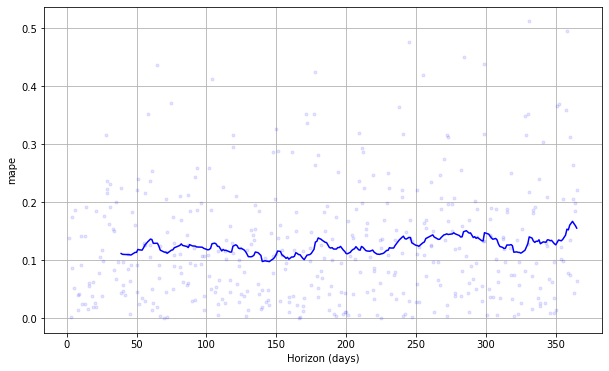

In [49]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

We can see that mape is too low when the Horizon(days) is between 140-150.

### Saving the Prophet model by dumping the model as pickle file for future usage

In [50]:
import pickle

In [51]:
with open(county_name+'_prophet_model_for_average_sale_price.pkl','wb') as file:
    pickle.dump(m,file)